In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import scipy.special as sp
from tqdm import tqdm
import scipy

In [3]:
qutip.__version__

'5.1.0.dev0+889dd09'

In [4]:
delta = 0.  * 2*np.pi
eps0  = 1. * 2*np.pi

A     = 0.01 * 2*np.pi
omega = 1 * 2*np.pi
T     = 2*np.pi / omega

tlist  = np.linspace(0.0, 300 * T, 1001)
psi0   = qutip.basis(2,1)

In [5]:
H0 = - delta/2.0 * qutip.sigmax() - eps0/2.0 * qutip.sigmaz()
H1 = A/2 * qutip.sigmax()
H = [H0, [H1, lambda t: np.cos(omega * t)]]

In [6]:
# noise power spectrum
gamma1 = 0.002
def noise_spectrum(w):
    return   gamma1 * (w>0)
    # return   gamma1 * np.abs(w)**1 * (w>0)

In [7]:
output = qutip.fmmesolve(
    H, psi0, tlist, [qutip.sigmax()],
    spectra_cb=[noise_spectrum], T=T,
     options={"store_floquet_states": True}
)

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00


20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.04s. Est. time left: 00:00:00:00
60.0%. Run time:   0.05s. Est. time left: 00:00:00:00
70.0%. Run time:   0.05s. Est. time left: 00:00:00:00
80.0%. Run time:   0.06s. Est. time left: 00:00:00:00
90.0%. Run time:   0.06s. Est. time left: 00:00:00:00
100.0%. Run time:   0.07s. Est. time left: 00:00:00:00
Total run time:   0.07s


In [8]:
p_ex = np.zeros(tlist.shape, dtype=np.complex128)
for idx, t in enumerate(tlist):
    psi_t = output.states[idx]
    p_ex[idx] = qutip.expect(qutip.sigmaz(), psi_t)

In [9]:
rate = 2 * np.pi * noise_spectrum(eps0) 

# For reference: calculate the same thing with mesolve
me_output = qutip.mesolve(H0, psi0, tlist,
                       [np.sqrt(rate) * qutip.sigmap()], [qutip.sigmaz()],)
p_ex_ref = me_output.expect[0]

med_output = qutip.mesolve(H, psi0, tlist,
                       [np.sqrt(rate) * qutip.sigmap()], [qutip.sigmaz()],)
p_ex_refd = med_output.expect[0]

/Users/yunwei/Desktop/PycharmProjects/qutip/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


(-1.0, 1.0)

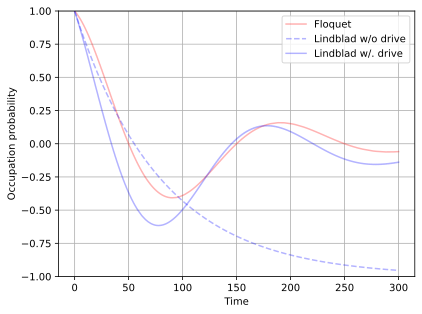

In [10]:
# plot the results
plt.plot(tlist, -np.real(p_ex), 'r', alpha = 0.3)
plt.plot(tlist, -np.real(p_ex_ref), 'b--', alpha=0.3)
plt.plot(tlist, -np.real(p_ex_refd), 'b', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Occupation probability')
plt.legend(("Floquet", "Lindblad w/o drive", "Lindblad w/. drive"))
plt.grid()
plt.ylim([-1,1])